K-Means Algorithm

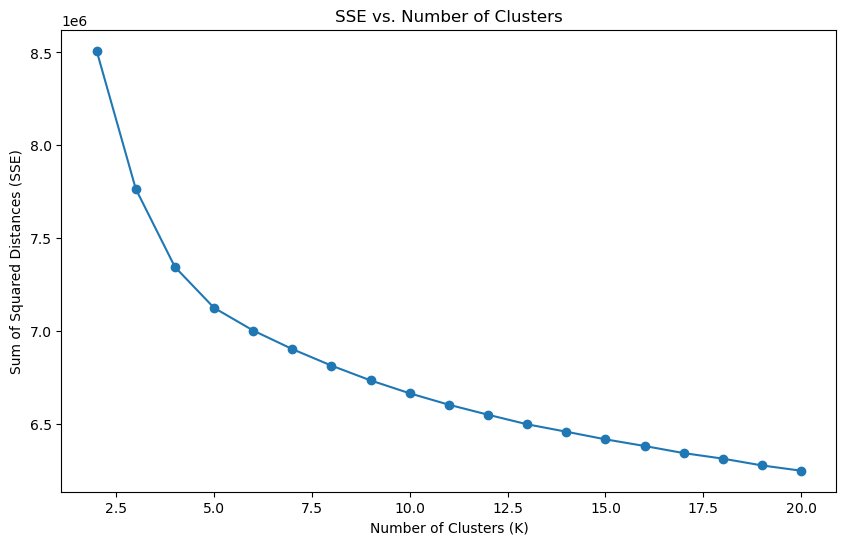

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
X = pd.read_csv('Data/X.csv')

# Define a range of clusters (K values) to try
k_values = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# Initialize an empty list to store SSE values
sse = []

# Iterate through different K values
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot SSE versus number of clusters with a larger size
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(k_values, sse, marker='o')
plt.title('SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()


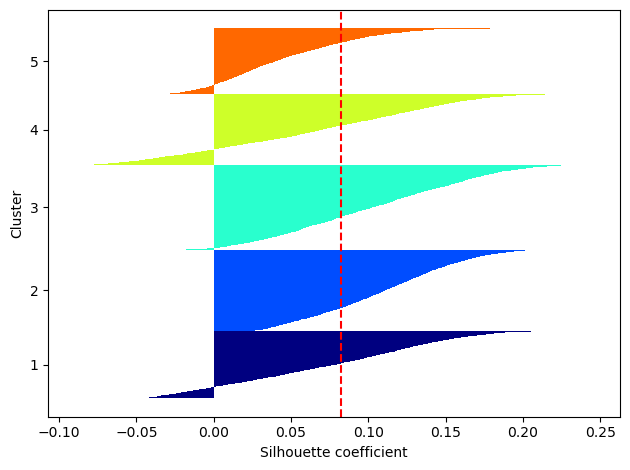

In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from matplotlib import cm

# Load your dataset
X = pd.read_csv('Data/X.csv')

# Initialize KMeans algorithm
km = KMeans(n_clusters=5, n_init=10, random_state=0)

# Apply KMeans algorithm to X
y_km = km.fit_predict(X)

# Calculate silhouette values for each sample
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

# Calculate the overall silhouette score
silhouette_avg = silhouette_score(X, y_km, metric='euclidean')

# Plot silhouette values for each cluster
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor="none", color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

# Plot the overall silhouette score
plt.axvline(silhouette_avg, color="red", linestyle="--")

# Set plot labels and layout
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()

# Show the plot
plt.show()


In [52]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from matplotlib import cm

# Load your dataset
X = pd.read_csv('Data/X.csv')

# Initialize KMeans algorithm
km = KMeans(n_clusters=5, n_init=10, random_state=0)

# Apply KMeans algorithm to X
y_km = km.fit_predict(X)

# Calculate silhouette values for each sample
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

# Create a DataFrame to store the indices and silhouette scores
silhouette_df = pd.DataFrame({'Index': X.index, 'Silhouette Score': silhouette_vals, 'Cluster': y_km})

# Sort the DataFrame by 'Silhouette Score' within each cluster
sorted_silhouette_df = silhouette_df.sort_values(by=['Cluster', 'Silhouette Score'], ascending=[True, False])

# Display the sorted DataFrame
display(sorted_silhouette_df)

# Print out the indices for each cluster
for cluster_label in np.unique(y_km):
    print(f"Cluster {cluster_label + 1}:")
    cluster_indices = sorted_silhouette_df[sorted_silhouette_df['Cluster'] == cluster_label]['Index'].values
    print(f"5 Samples at the core of cluster {cluster_label + 1}:")
    print(cluster_indices[0])
    print(cluster_indices[1])
    print(cluster_indices[2])
    print(cluster_indices[3])
    print(cluster_indices[4])
    # Get the indices with silhouette scores close to zero
    zero_silhouette_indices = sorted_silhouette_df[(sorted_silhouette_df['Cluster'] == cluster_label) &
                                                   (sorted_silhouette_df['Silhouette Score'].abs() < 0.001)]['Index'].values
    if len(zero_silhouette_indices) > 2:
        print(f"2 Samples at the boundary of cluster {cluster_label + 1} and another cluster:")
        print(zero_silhouette_indices[0])
        print(zero_silhouette_indices[1])


,Index,Silhouette Score,Cluster
3336,3336,0.223963,0
4988,4988,0.218127,0
8527,8527,0.216276,0
7672,7672,0.216203,0
8142,8142,0.214369,0
...,...,...,...
882,882,-0.032285,4
2109,2109,-0.032514,4
5241,5241,-0.032605,4
424,424,-0.033052,4


Cluster 1:
5 Samples at the core of cluster 1:
3336
4988
8527
7672
8142
2 Samples at the boundary of cluster 1 and another cluster:
7850
7507
Cluster 2:
5 Samples at the core of cluster 2:
4012
7520
6305
2608
1223
Cluster 3:
5 Samples at the core of cluster 3:
7352
55
1802
6818
5963
2 Samples at the boundary of cluster 3 and another cluster:
889
7820
Cluster 4:
5 Samples at the core of cluster 4:
9952
6339
2448
3855
2898
2 Samples at the boundary of cluster 4 and another cluster:
1771
8618
Cluster 5:
5 Samples at the core of cluster 5:
1684
2221
3817
4848
8001
2 Samples at the boundary of cluster 5 and another cluster:
8300
8270


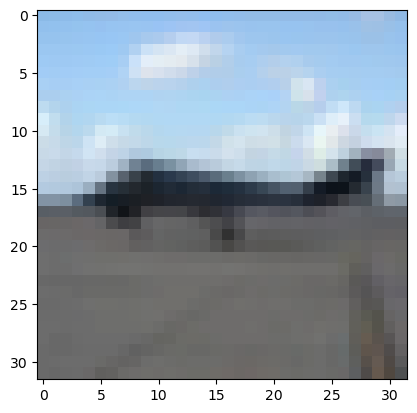

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
df_images = pd.read_csv('Data/images.csv')

# Convert the DataFrame to a NumPy array
images_np = df_images.to_numpy()

# Cluster 5:
# 5 Samples at the core of cluster 5:
# 1684
# 2221
# 3817
# 4848
# 8001
# 2 Samples at the boundary of cluster 5 and another cluster:
# 8300
# 8270

# Display the image
plt.imshow(images_np[8270].reshape(32, 32, 3))
plt.show()

In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd

# Load your dataset
X = pd.read_csv('Data/X.csv')

# Ground truth
y = pd.read_csv('Data/y.csv').values.ravel()

# Initialize KMeans algorithm
km = KMeans(n_clusters=5, n_init=10, random_state=0)

# Apply KMeans algorithm to X
y_km = km.fit_predict(X)

# Compute the Adjusted Rand Index
ari = adjusted_rand_score(y, y_km)

# Print the Adjusted Rand Index
print(f"Adjusted Rand Index: {ari}")


Adjusted Rand Index: 0.7693878054719354
